In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv
User uploaded file "mental_health_workplace_survey.csv" with length 371354 bytes


In [ ]:
# Import all necessary libraries
import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical computations
import seaborn as sns               # For advanced visualizations
import matplotlib.pyplot as plt     # For basic plotting
import warnings

# Settings to improve readability
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)



In [ ]:
# Load the dataset
df = pd.read_csv("mental_health_workplace_survey.csv")  # Replace with your local file path if needed

# Preview first few rows
df.head()



,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,5.06,9.47,4.16,7.0,7.9,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,2.00,5.65,3.74,7.2,9.0,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,7.17,5.70,8.80,5.2,9.7,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,3.76,6.40,4.69,8.7,5.8,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,2.34,3.41,2.12,4.2,3.3,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [ ]:
# Shape of the dataset
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Check data types and non-null counts
df.info()

# Check summary statistics for numeric columns
df.describe()

Total Rows: 3000
Total Columns: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  Physi

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,ManagerSupportScore,MentalHealthDaysOff,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.00000,3000.00000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,2500.500000,40.805667,10.099333,44.504000,5.509137,5.43750,5.51535,5.51956,6.539000,5.030400,59.227000,5.44254,4.544667,5.450950,25.20100,5.520680,0.326667
std,866.169729,11.011705,6.035032,8.491526,2.574072,2.59443,2.60361,2.60761,1.441876,2.861026,34.809779,2.59740,2.854129,2.602379,14.08645,2.566861,0.469072
min,1001.000000,22.000000,0.000000,30.000000,1.000000,1.00000,1.00000,1.00000,4.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.00000,1.000000,0.000000
25%,1750.750000,31.000000,5.000000,37.000000,3.300000,3.18000,3.26000,3.28000,5.300000,2.600000,29.000000,3.16000,2.000000,3.160000,13.00000,3.300000,0.000000
50%,2500.500000,41.000000,10.000000,45.000000,5.480000,5.43000,5.49500,5.49000,6.600000,5.000000,59.000000,5.44000,5.000000,5.425000,25.00000,5.580000,0.000000
75%,3250.250000,50.000000,15.000000,52.000000,7.640000,7.68000,7.82250,7.80250,7.800000,7.500000,90.000000,7.69000,7.000000,7.730000,37.00000,7.642500,1.000000
max,4000.000000,59.000000,20.000000,59.000000,10.000000,10.00000,10.00000,10.00000,9.000000,10.000000,119.000000,9.99000,9.000000,10.000000,49.00000,9.990000,1.000000


In [ ]:
# Check total missing values per column
df.isnull().sum().sort_values(ascending=False)

,0
EmployeeID,0
Age,0
Gender,0
Country,0
JobRole,0
Department,0
YearsAtCompany,0
WorkHoursPerWeek,0
RemoteWork,0
BurnoutLevel,0


Filled missing values in EmployeeID with median: 2500.5
Filled missing values in Age with median: 41.0
Filled missing values in YearsAtCompany with median: 10.0
Filled missing values in WorkHoursPerWeek with median: 45.0
Filled missing values in BurnoutLevel with median: 5.48
Filled missing values in JobSatisfaction with median: 5.43
Filled missing values in StressLevel with median: 5.495
Filled missing values in ProductivityScore with median: 5.49
Filled missing values in SleepHours with median: 6.6
Filled missing values in PhysicalActivityHrs with median: 5.0
Filled missing values in CommuteTime with median: 59.0
Filled missing values in ManagerSupportScore with median: 5.44
Filled missing values in MentalHealthDaysOff with median: 5.0
Filled missing values in WorkLifeBalanceScore with median: 5.425
Filled missing values in TeamSize with median: 25.0
Filled missing values in CareerGrowthScore with median: 5.58
Filled missing values in BurnoutRisk with median: 0.0
Filled missing value

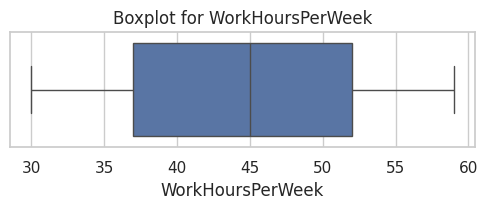

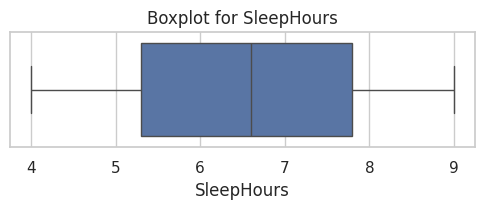

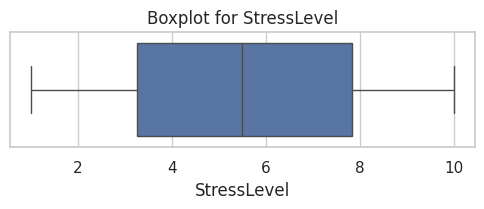

In [ ]:
# Handle numeric columns (int/float)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)  # Replaces missing values with median
    print(f"Filled missing values in {col} with median: {median_val}")

# Handle categorical columns (object/string)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)    # Replaces missing values with most frequent value
    print(f"Filled missing values in {col} with mode: {mode_val}")

# Plot boxplots for key numeric features
features = ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']
for col in features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_size = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_size - df.shape[0]
    print(f"{removed} outliers removed from '{col}'")
    return df

# Remove outliers from important features
for col in ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']:
    df = remove_outliers_iqr(df, col)


0 outliers removed from 'WorkHoursPerWeek'
0 outliers removed from 'SleepHours'
0 outliers removed from 'StressLevel'


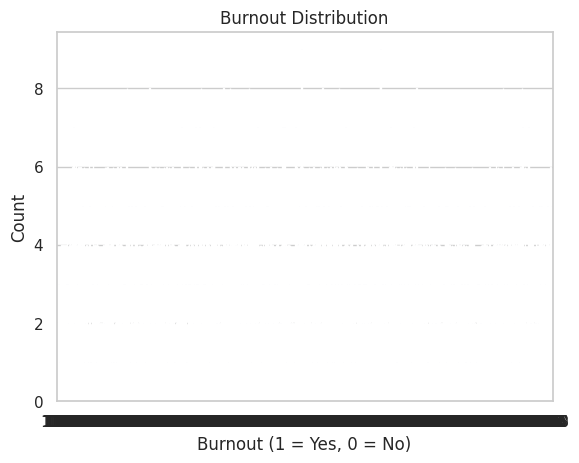

In [ ]:
# Burnout counts
sns.countplot(x='BurnoutLevel', data=df)
plt.title("Burnout Distribution")
plt.xlabel("Burnout (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


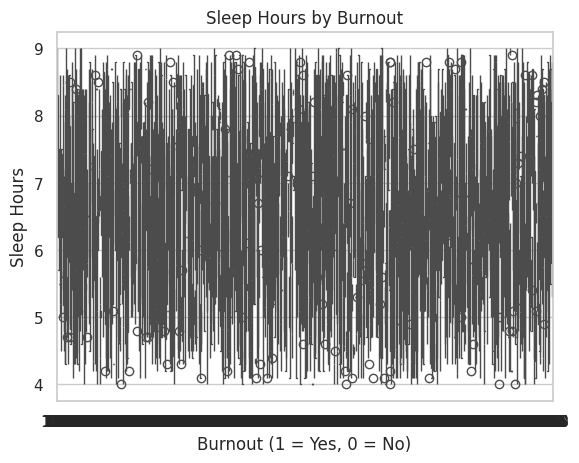

In [ ]:
# Boxplot of Sleep_hours vs Burnout
sns.boxplot(x='BurnoutLevel', y='SleepHours', data=df)
plt.title("Sleep Hours by Burnout")
plt.xlabel("Burnout (1 = Yes, 0 = No)")
plt.ylabel("Sleep Hours")
plt.show()


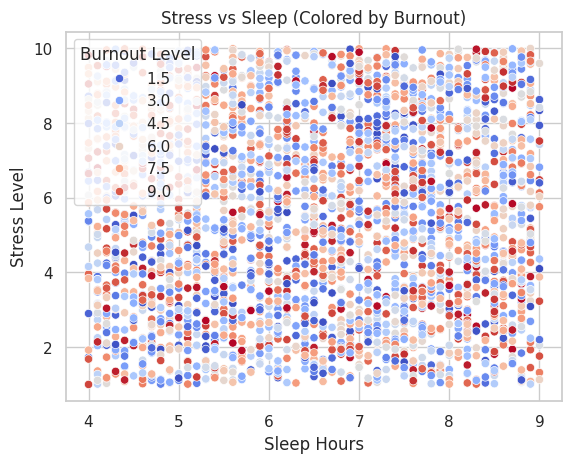

In [ ]:
# Scatterplot of Stress vs Sleep colored by Burnout
sns.scatterplot(x='SleepHours', y='StressLevel', hue='BurnoutLevel', data=df, palette='coolwarm')
plt.title("Stress vs Sleep (Colored by Burnout)")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.legend(title="Burnout Level")
plt.show()


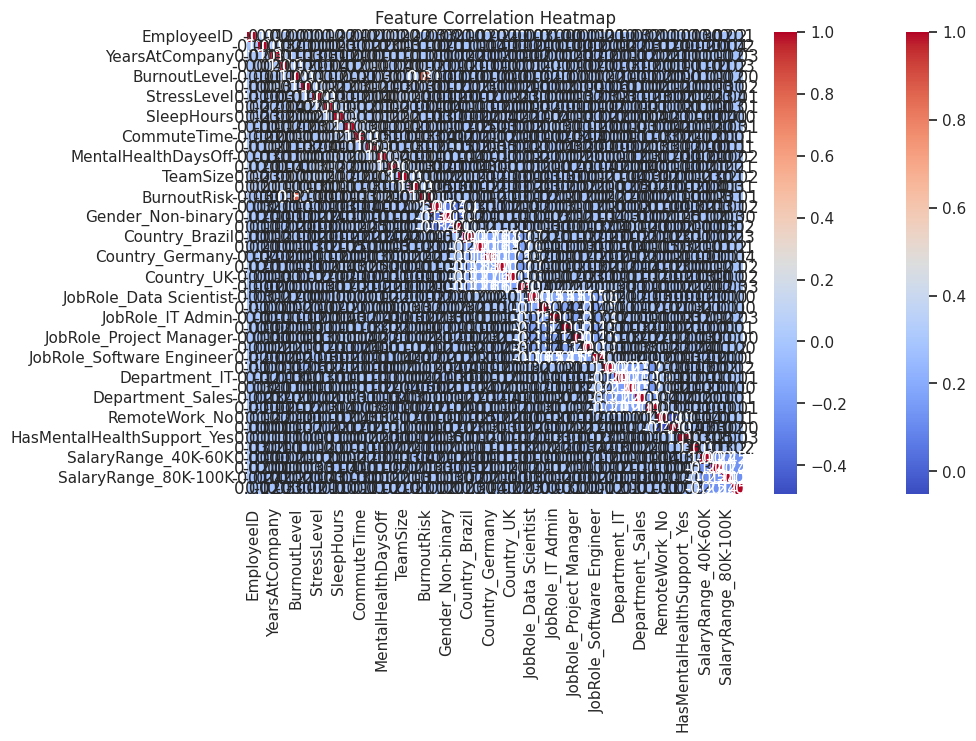

In [ ]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')
corr_matrix1 = numeric_df.corr()
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
df_encoded = pd.get_dummies(df, drop_first=True)
corr_matrix2 = df_encoded.corr()
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Save cleaned dataset for later use
df.to_csv("cleaned_burnout_dataset.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.


# Writeup for the day :

- The code was done with the help of the reference code given by making the required changes in it. The required concepts to complete it was learnt with the help of the sites referred and with the help of the AI platforms (ChatGPT and Gemini, which is already available in the Google Colab).
The use of Gemini made it easier for me to figure out my mistakes easily by which the time I was able to utilise to learn the concepts required.<br/>

- Things learnt for the day :- Reading the file to the Google Colab, Understanding the data, Cleaning the data by figuring out the null values and unrequired columns or entries in it and clearing it accordingly, Finding and handling the outliers and after that most importantly EDA (where the data is visualized in a more meaningful way with the help of scatterplots and line graphs and all. Together with the correlation part is also been checked and I think I need to learn more about this topic to get even more a deep understanding of the topic.<br/>
  A cleaned data obtained at the end.<br/>

- Blockers faced :- To continue with the code of the correlation part which I somehow understood what the error is due to and learnt how to solve it by searching on it further. But I need to go through it once again.<br/>